In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression




Setting up Diamonds Dataset

In [2]:
# Diamonds Dataset
dataset1 = pd.read_csv('diamonds.csv')
# perform one-hot encoding on the 'cut', 'color', 'clarity' columns
dataset1_encoded = pd.get_dummies(dataset1, columns=['cut', 'color', 'clarity'])
# Drop 'Unnamed: 0' column from dataset1
dataset1_encoded = dataset1_encoded.drop('Unnamed: 0', axis=1)


Setting up Emissions Dataset

In [3]:
# CO and NOX Emission Dataset
years = range(2011, 2016)
dataset2_sep = []
for year in years:
    df = pd.read_csv('pp_gas_emission/gt_'+str(year)+'.csv')
    df['year'] = year  # adding a new column 'year' to the dataframe
    dataset2_sep.append(df)

# concatenate all the dataframes in the list
dataset2 = pd.concat(dataset2_sep, ignore_index=True)
# perform one-hot encoding on the 'year' column
dataset2_encoded = pd.get_dummies(dataset2, columns=['year'])
# Drop 'CO' column from dataset2
dataset2_encoded = dataset2_encoded.drop('CO', axis=1)

Question 1.1 for Diamonds Dataset

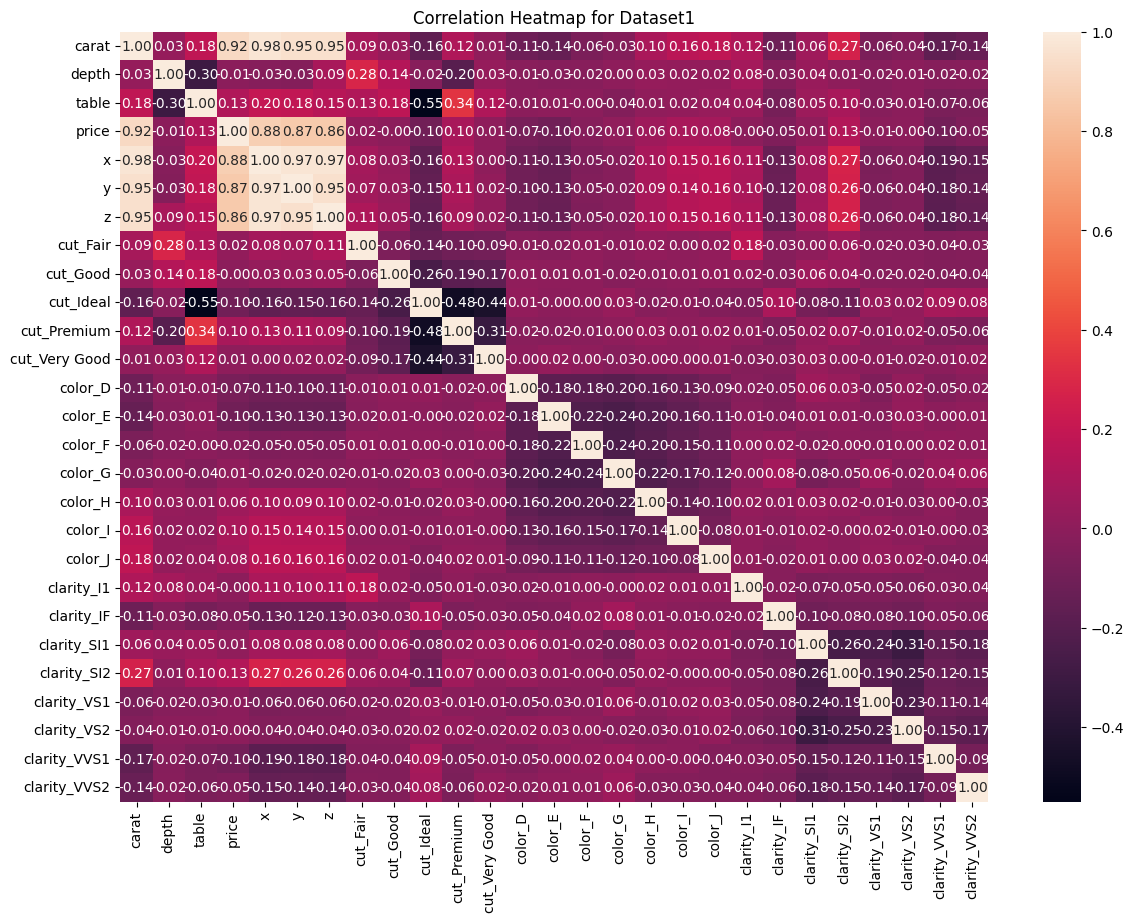

Features with the highest absolute correlation with 'price', excluding one-hot encoded features:
carat    0.921591
x        0.884436
y        0.865422
z        0.861250
table    0.127134
depth    0.010648
Name: price, dtype: float64


In [4]:
# compute the correlation matrix for dataset1
corr1 = dataset1_encoded.corr()

# create a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr1, annot=True, fmt=".2f")
plt.title('Correlation Heatmap for Dataset1')
plt.show()

# For dataset1, find all one-hot encoded features related to 'cut', 'color', and 'clarity'
dataset1_onehot_cols = [col for col in dataset1_encoded if 'cut_' in col or 'color_' in col or 'clarity_' in col]

# calculate and print correlations excluding one-hot encoded features
print("Features with the highest absolute correlation with 'price', excluding one-hot encoded features:")
print(corr1.drop(dataset1_onehot_cols)['price'].apply(abs).sort_values(ascending=False)[1:])


Question 1.1 for Emissions Dataset

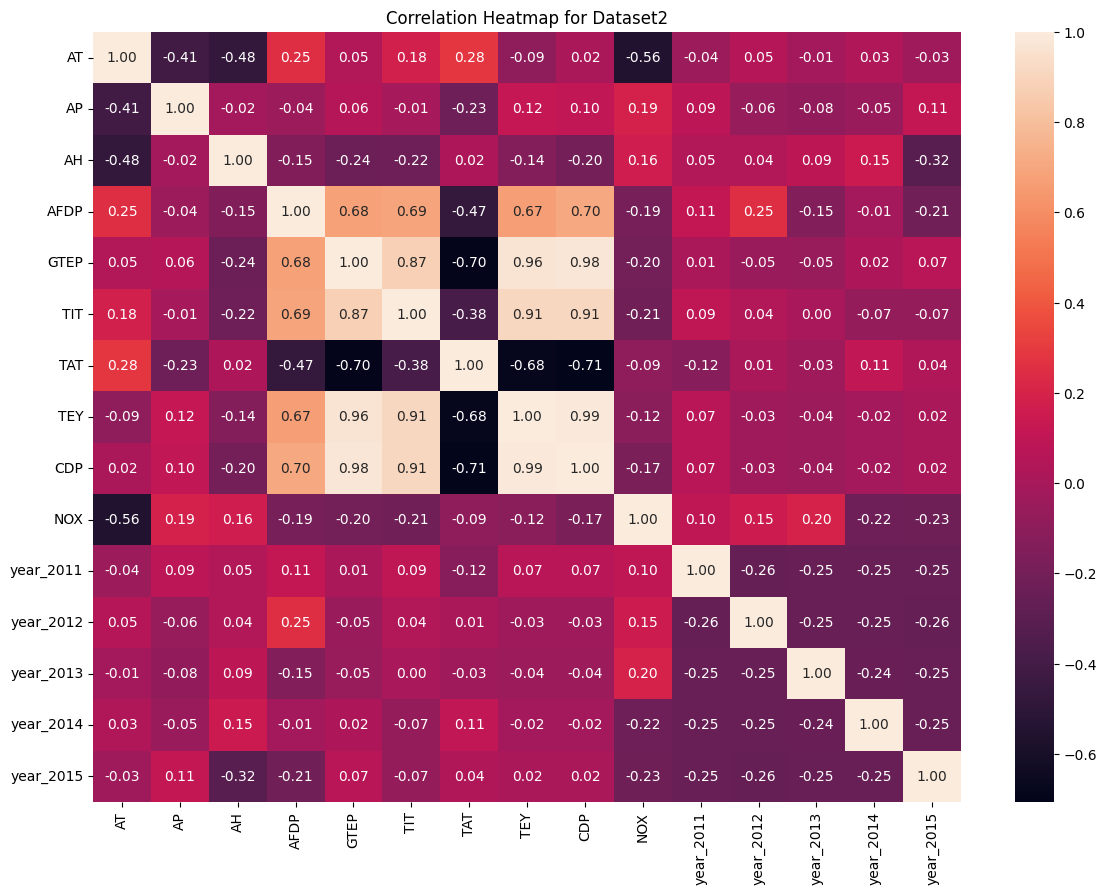

Features with the highest absolute correlation with 'NOX', excluding one-hot encoded features:
AT      0.558174
TIT     0.213865
GTEP    0.201630
AP      0.191938
AFDP    0.188247
CDP     0.171256
AH      0.164617
TEY     0.116127
TAT     0.092791
Name: NOX, dtype: float64


In [5]:
# compute the correlation matrix for dataset2
corr2 = dataset2_encoded.corr()

# create a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr2, annot=True, fmt=".2f")
plt.title('Correlation Heatmap for Dataset2')
plt.show()

# For dataset2, find all one-hot encoded features related to 'year'
dataset2_onehot_cols = [col for col in dataset2_encoded if 'year_' in col]

print("Features with the highest absolute correlation with 'NOX', excluding one-hot encoded features:")
print(corr2.drop(dataset2_onehot_cols)['NOX'].apply(abs).sort_values(ascending=False)[1:])

Question 1.2 for Diamonds Dataset

Diamonds Dataset:


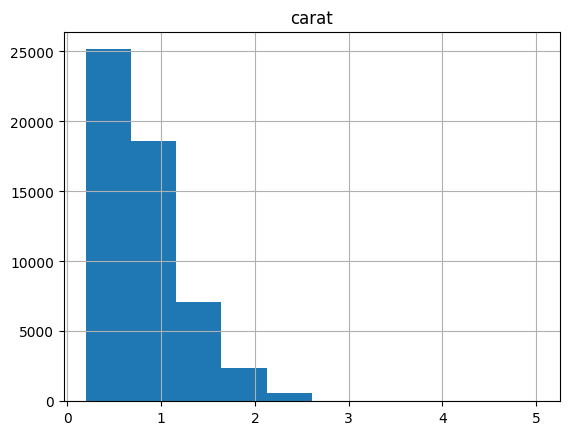

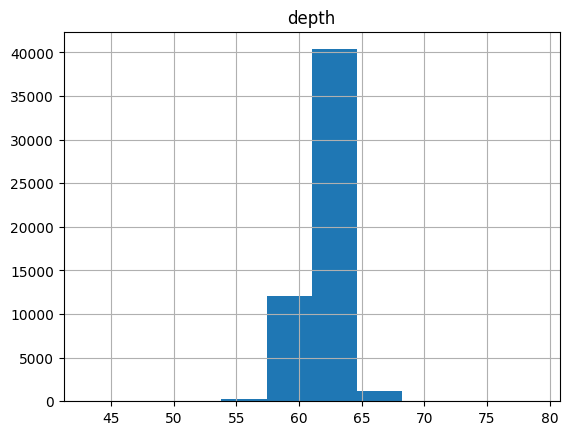

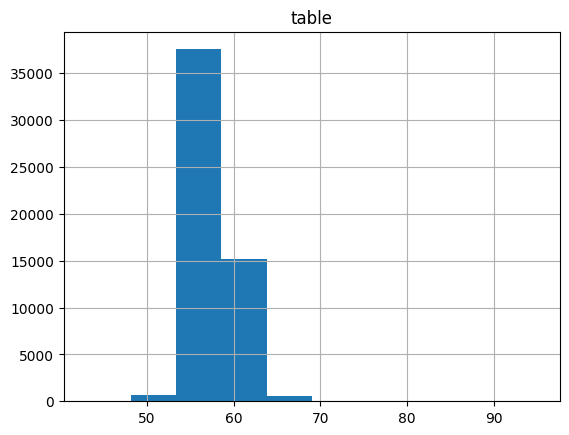

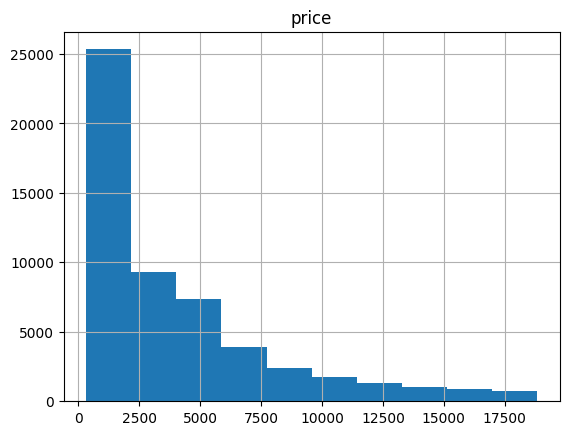

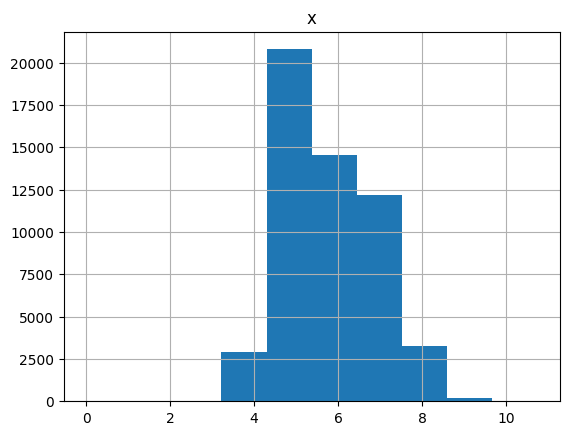

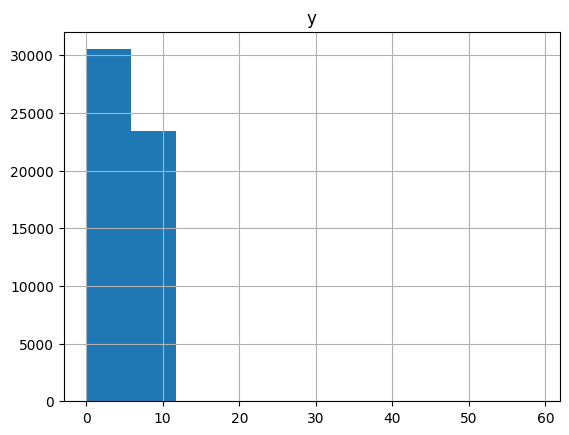

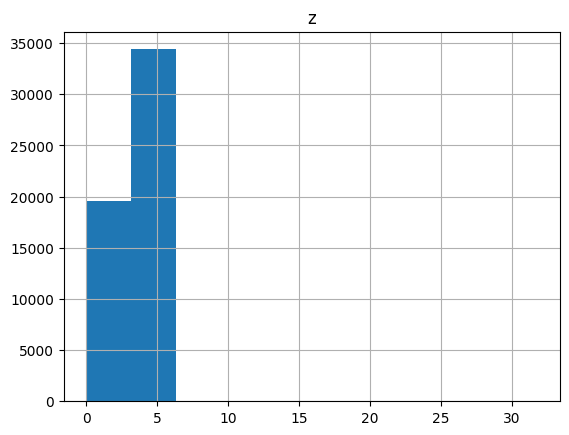

In [6]:
# Histograms for Dataset1
print("Diamonds Dataset:")
for column in dataset1_encoded.select_dtypes(include=[np.number]).columns:
    plt.figure()
    dataset1_encoded[column].hist()
    plt.title(column)
    plt.show()

Question 1.2 for Emissions Dataset

Emissions Dataset


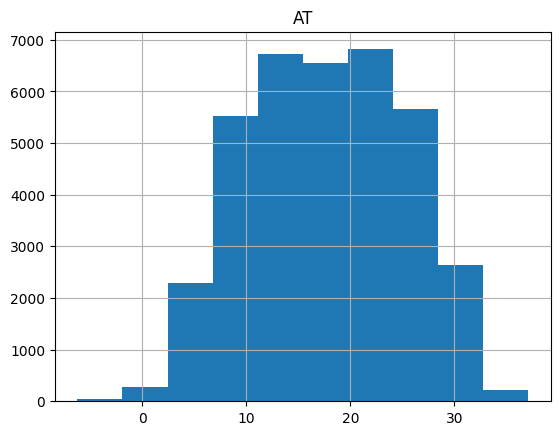

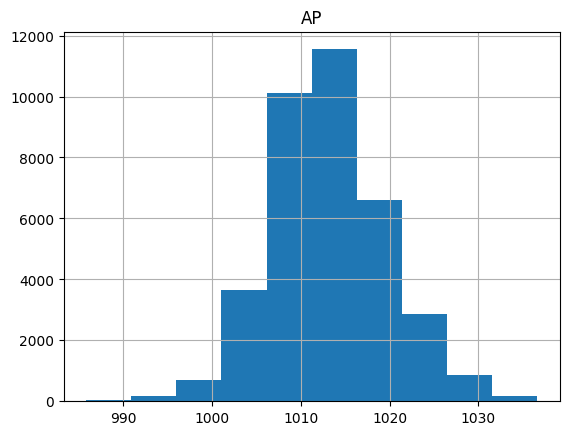

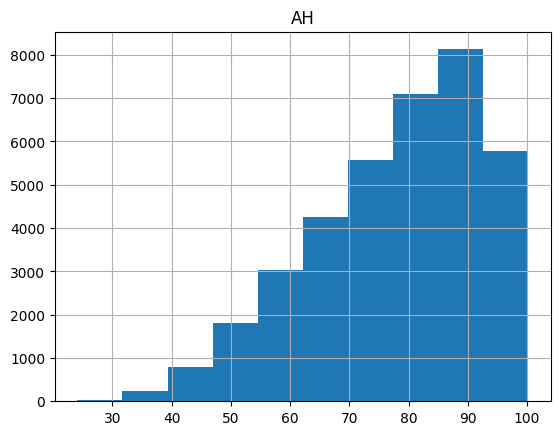

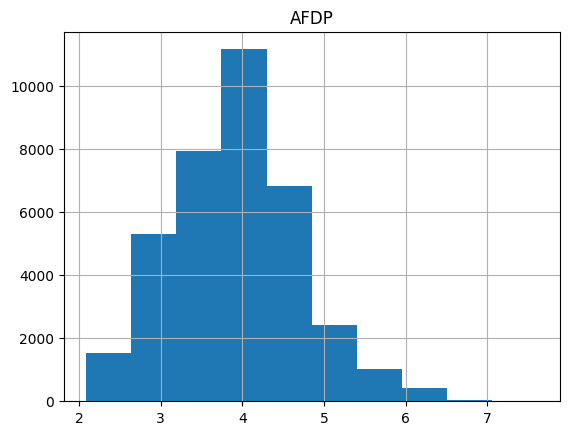

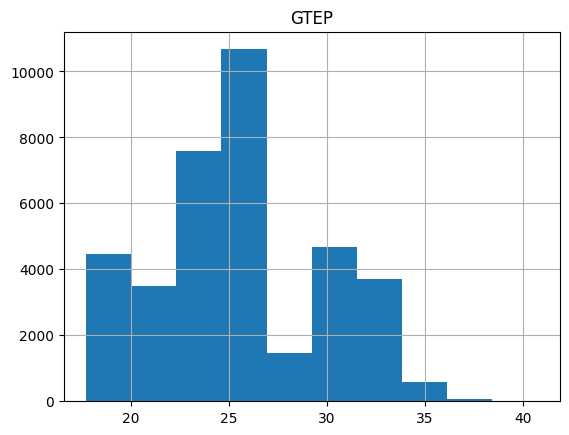

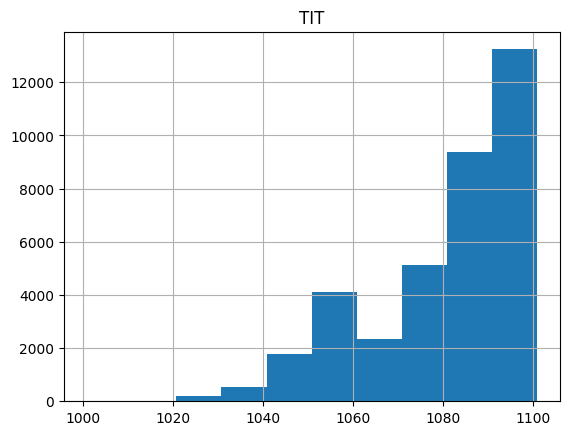

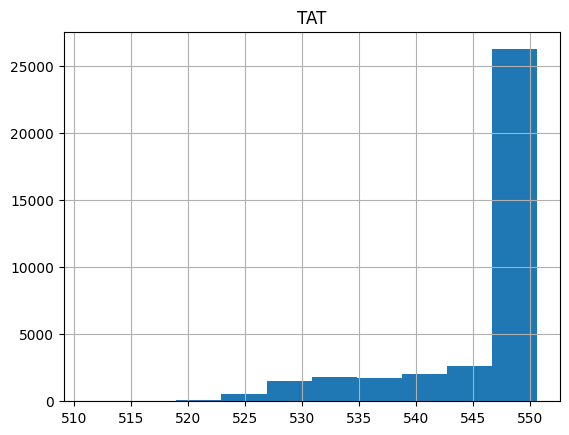

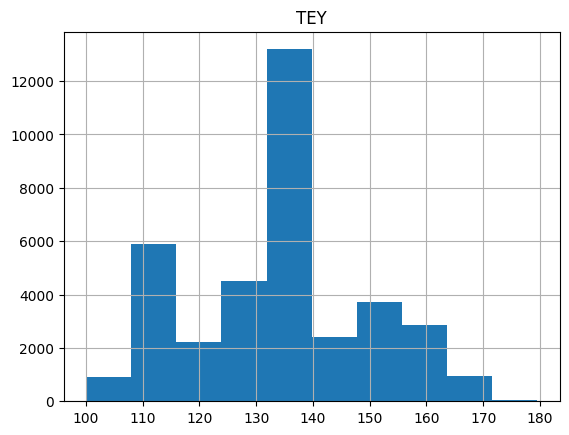

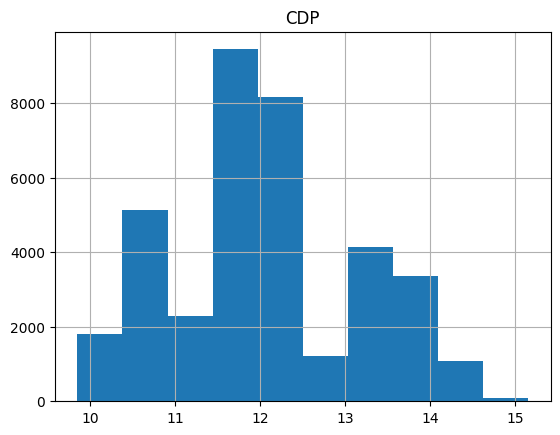

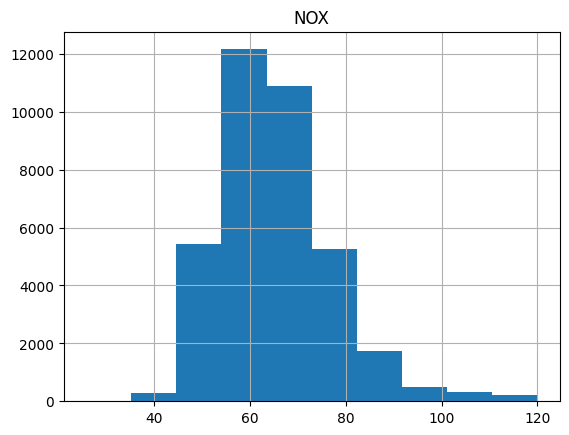

In [7]:
# Histograms for Dataset2
print("Emissions Dataset")
for column in dataset2_encoded.select_dtypes(include=[np.number]).columns:
    plt.figure()
    dataset2_encoded[column].hist()
    plt.title(column)
    plt.show()

Question 1.3 for Diamonds Dataset

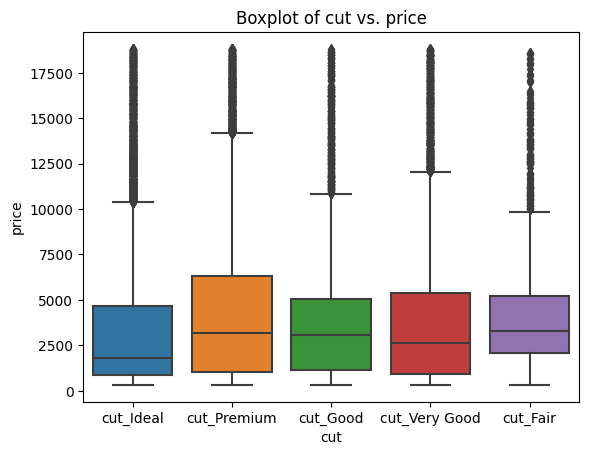

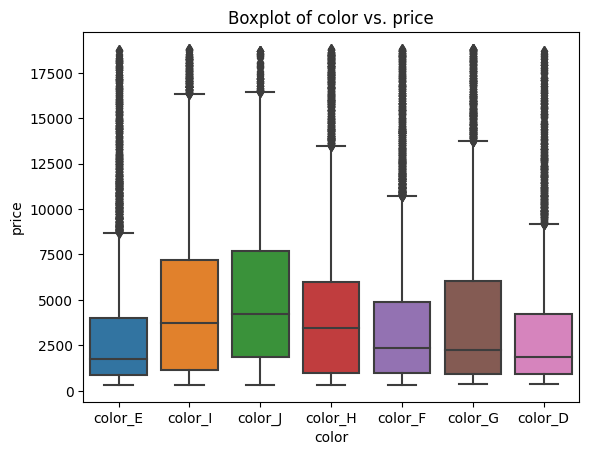

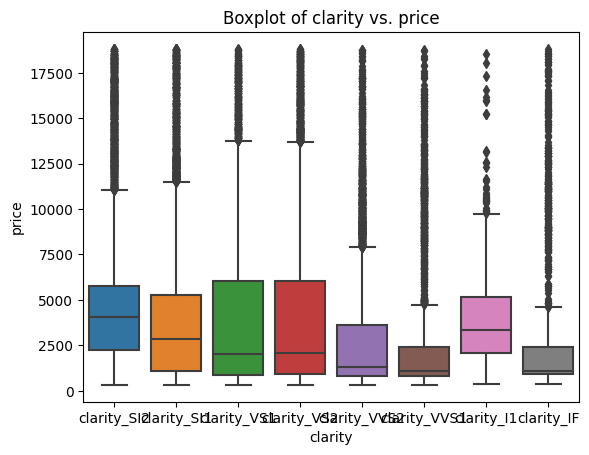

In [8]:
# Revert one-hot encoding in dataset1
dataset1['cut'] = dataset1_encoded.loc[:, 'cut_Fair':'cut_Very Good'].idxmax(axis=1)
dataset1['color'] = dataset1_encoded.loc[:, 'color_D':'color_J'].idxmax(axis=1)
dataset1['clarity'] = dataset1_encoded.loc[:, 'clarity_I1':'clarity_VVS2'].idxmax(axis=1)

# Create boxplots
for col in ['cut', 'color', 'clarity']:
    plt.figure()
    sns.boxplot(x=col, y='price', data=dataset1)
    plt.title(f'Boxplot of {col} vs. price')
    plt.show()


Question 1.3 for Emissions Dataset

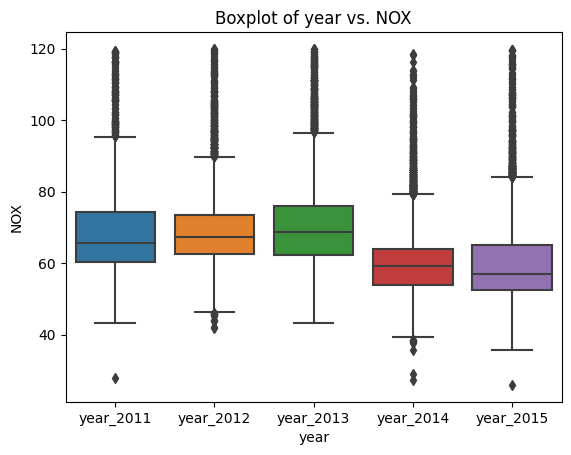

In [9]:
# Revert one-hot encoding in dataset2
dataset2['year'] = dataset2_encoded.loc[:, 'year_2011':'year_2015'].idxmax(axis=1)

# Create boxplot
plt.figure()
sns.boxplot(x='year', y='NOX', data=dataset2)
plt.title('Boxplot of year vs. NOX')
plt.show()
dataset2['year'] = dataset2['year'].str.replace('year_', '').astype(int)


Question 1.4 for Diamonds Dataset

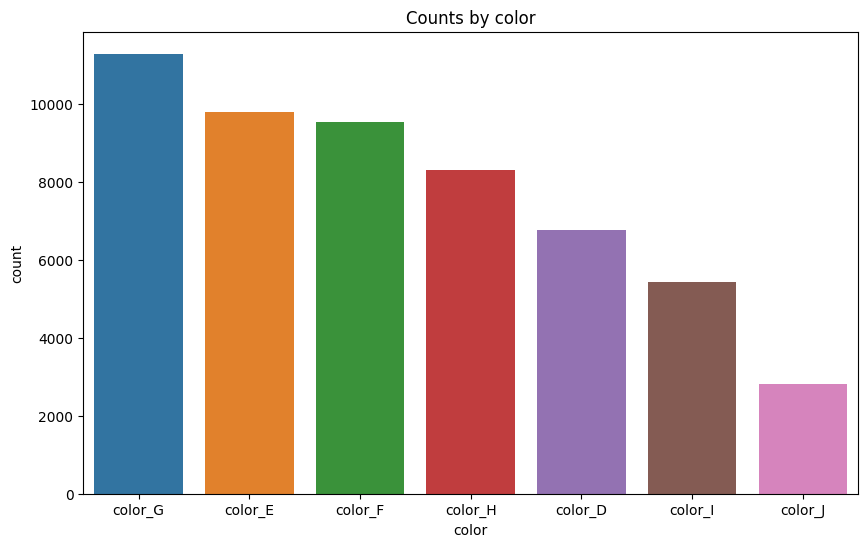

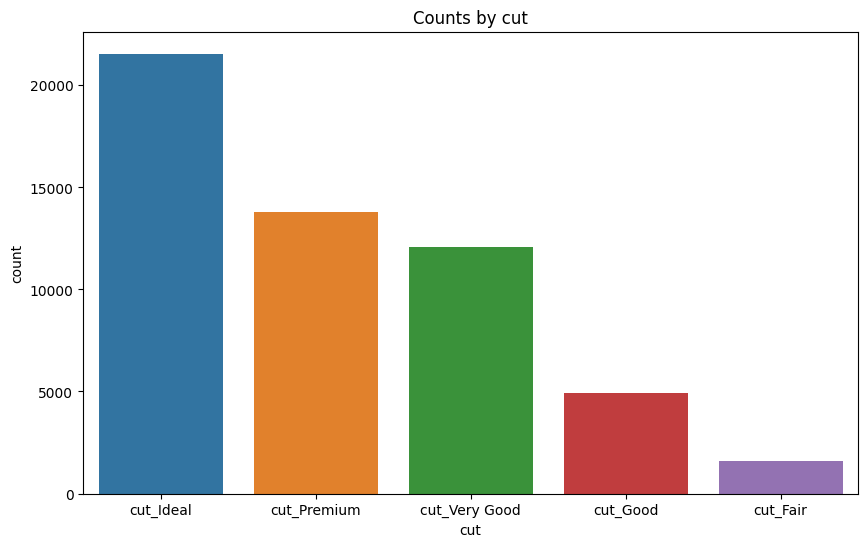

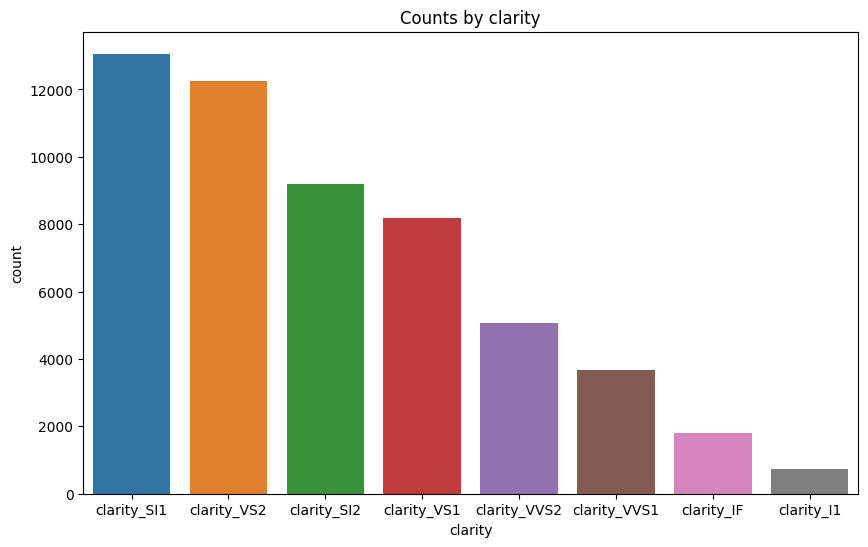

In [10]:
for col in ['color', 'cut', 'clarity']:
    plt.figure(figsize=(10,6))
    sns.countplot(data=dataset1, x=col, order = dataset1[col].value_counts().index)
    plt.title(f'Counts by {col}')
    plt.show()

Question 1.4 for Emissions Dataset

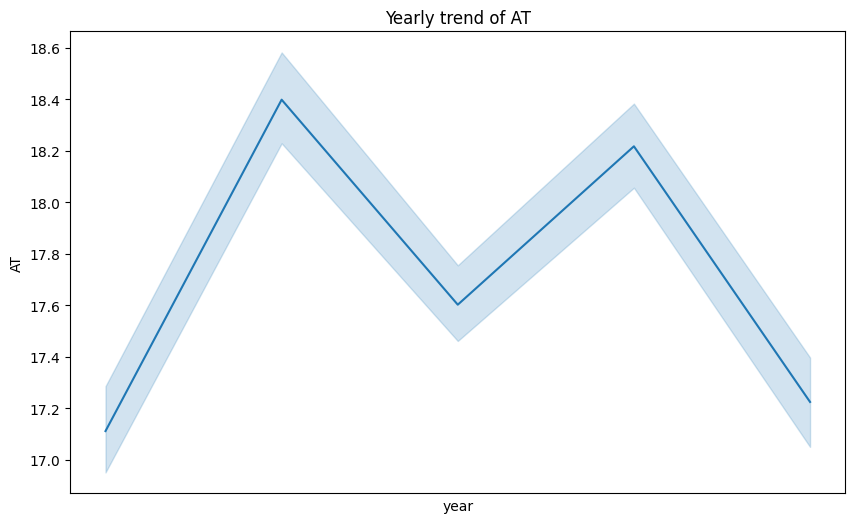

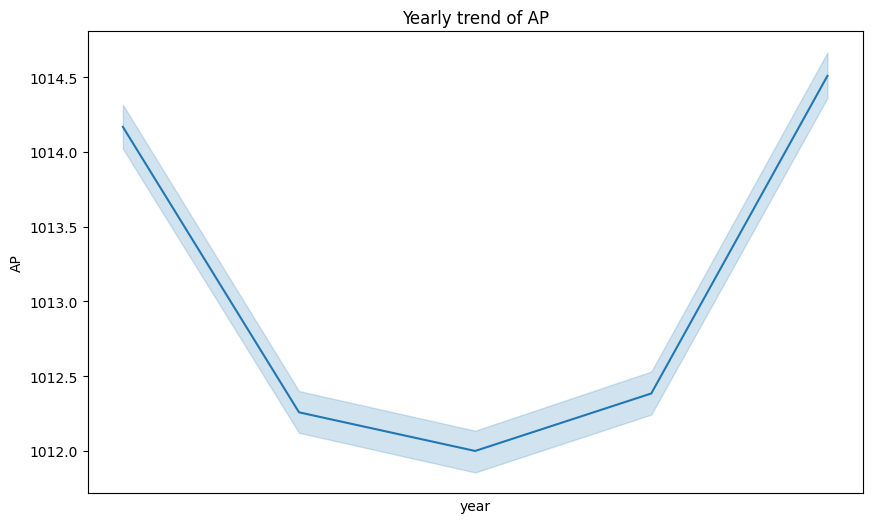

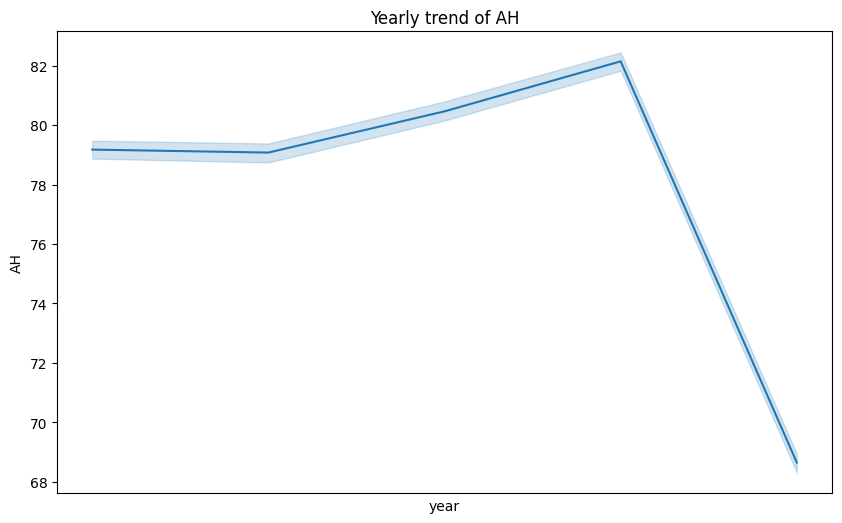

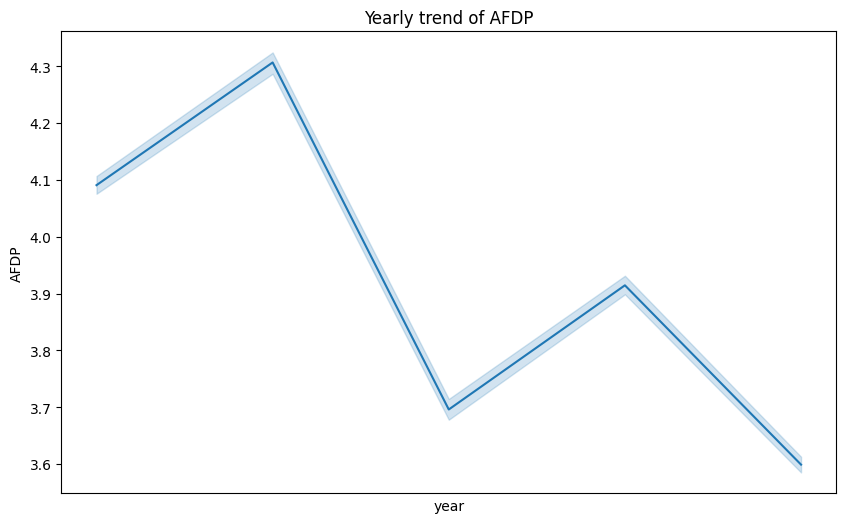

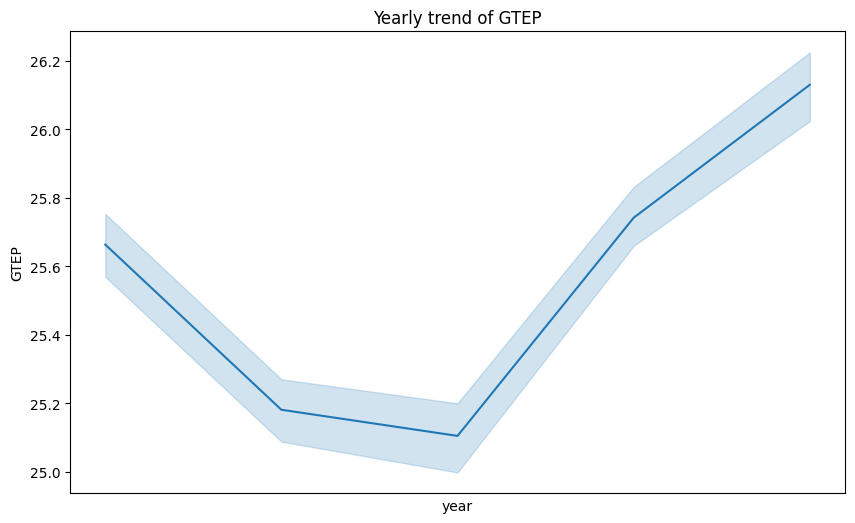

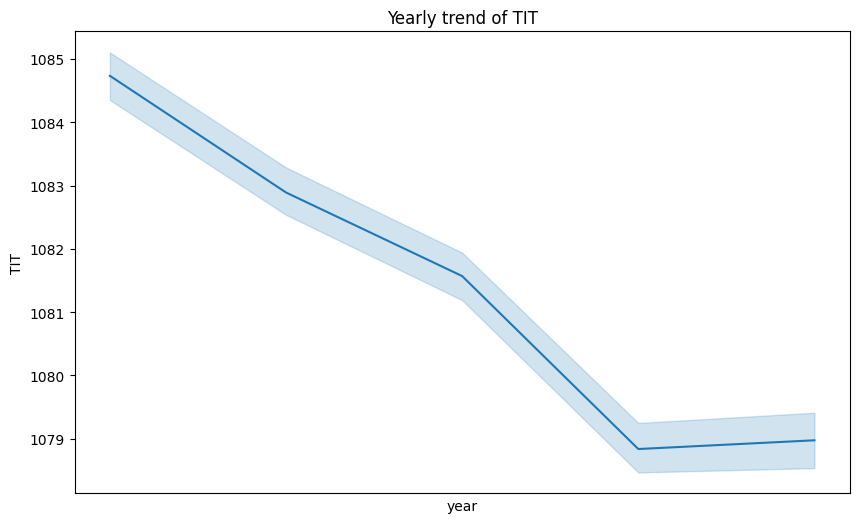

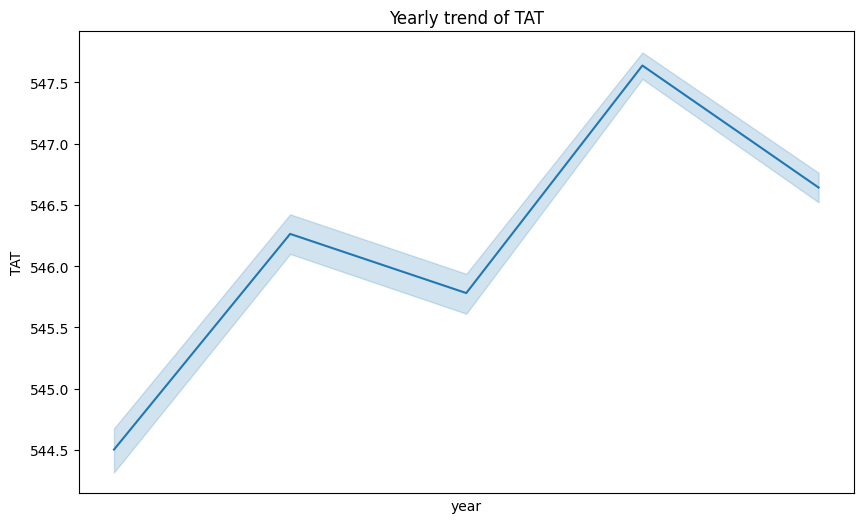

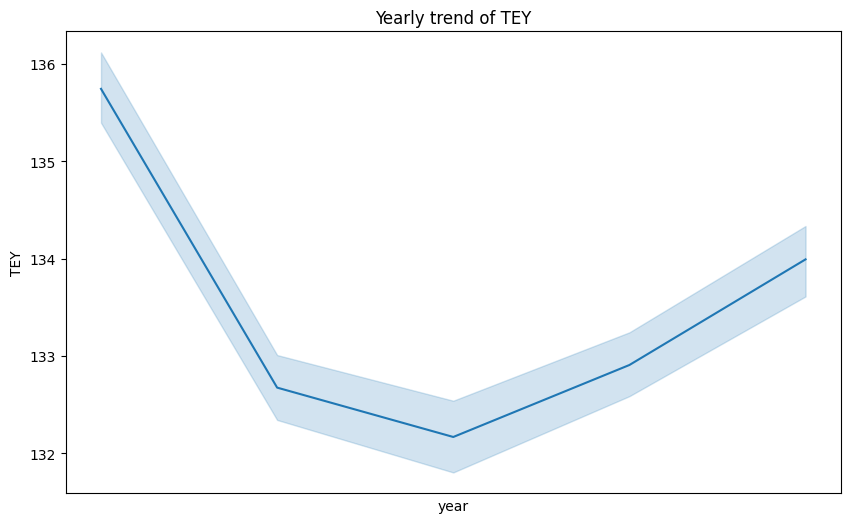

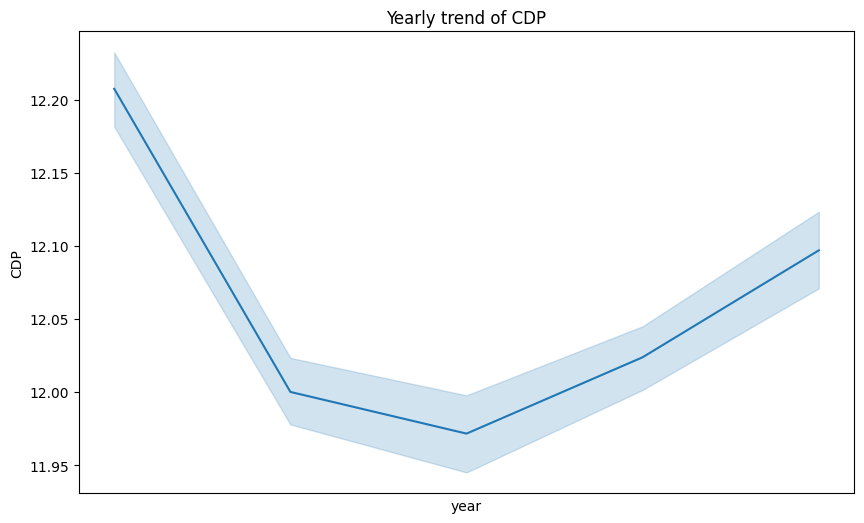

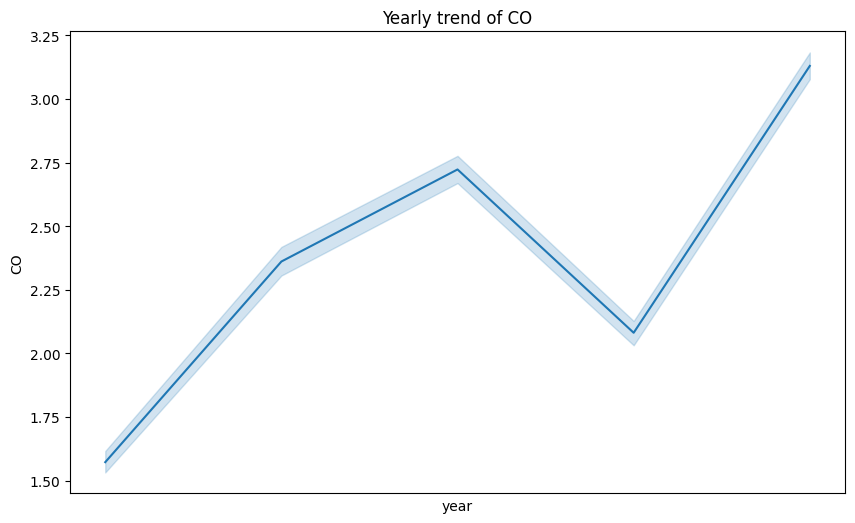

In [11]:
# convert 'year' column to datetime
dataset2['year'] = pd.to_datetime(dataset2['year'])

# drop 'NOX' from the dataset for plotting other features
features = dataset2.drop(columns=['NOX','year'], axis=1).columns

# create line plots for each feature
for feature in features:
    plt.figure(figsize=(10,6))
    sns.lineplot(data=dataset2, x='year', y=feature)
    plt.title(f'Yearly trend of {feature}')
    plt.show()

Question 2.1 for Diamonds Dataset

In [20]:
# Split features and targets
scaler = StandardScaler()
dataset1_features_regression = dataset1_encoded.drop(columns=['price','cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], axis=1)
dataset1_target = dataset1_encoded['price']
dataset1_features_scaled = scaler.fit_transform(dataset1_features_regression)
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(dataset1_features_scaled, dataset1_target, test_size=0.2, random_state=42)

Question 2.1 for Emissions Dataset

In [21]:
# Standardize features
scaler = StandardScaler()
dataset2_features_regression = dataset2_encoded.drop(columns=['NOX', 'year_2011','year_2012','year_2013','year_2014','year_2015'], axis=1)
dataset2_target = dataset2_encoded['NOX']
dataset2_features_scaled = scaler.fit_transform(dataset2_features_regression)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(dataset2_features_scaled, dataset2_target, test_size=0.2, random_state=42)

Question 2.2 for Diamonds Dataset

In [22]:
# Compute mutual information for dataset1
mi_dataset1 = mutual_info_regression(dataset1_features_scaled, dataset1_target)
mi_dataset1 = pd.Series(mi_dataset1, index=dataset1_features_regression.columns)
mi_dataset1.sort_values(ascending=False, inplace=True)

print("Mutual Information - dataset1:")
print(mi_dataset1)

# Compute F-value score for dataset1
f_values_dataset1, p_values_dataset1 = f_regression(dataset1_features_scaled, dataset1_target)
f_scores_dataset1 = pd.Series(f_values_dataset1, index=dataset1_features_regression.columns)
f_scores_dataset1.sort_values(ascending=False, inplace=True)

print("F-value Scores - dataset1:")
print(f_scores_dataset1)

# Two features with lowest Mutual Information for dataset1
lowest_mi_features_dataset1 = mi_dataset1.nsmallest(2).index.tolist()
print("Two features with the lowest Mutual Information for dataset1:", lowest_mi_features_dataset1)


Mutual Information - dataset1:
carat    1.653045
y        1.421508
x        1.412293
z        1.360762
table    0.035058
depth    0.031153
dtype: float64
F-value Scores - dataset1:
carat    304051.486619
x        193741.523066
y        160915.662263
z        154923.266553
table       886.119363
depth         6.115863
dtype: float64
Two features with the lowest Mutual Information for dataset1: ['depth', 'table']


Question 2.2 for Emissions Dataset

In [23]:
# Compute mutual information for dataset2
mi_dataset2 = mutual_info_regression(dataset2_features_scaled, dataset2_target)
mi_dataset2 = pd.Series(mi_dataset2, index=dataset2_features_regression.columns)
mi_dataset2.sort_values(ascending=False, inplace=True)

print("\nMutual Information - dataset2:")
print(mi_dataset2)


# Compute F-value score for dataset2
f_values_dataset2, p_values_dataset2 = f_regression(dataset2_features_scaled, dataset2_target)
f_scores_dataset2 = pd.Series(f_values_dataset2, index=dataset2_features_regression.columns)
f_scores_dataset2.sort_values(ascending=False, inplace=True)

print("\nF-value Scores - dataset2:")
print(f_scores_dataset2)

# Two features with lowest Mutual Information for dataset2
lowest_mi_features_dataset2 = mi_dataset2.nsmallest(2).index.tolist()
print("Two features with the lowest Mutual Information for dataset2:", lowest_mi_features_dataset2)


Mutual Information - dataset2:
TIT     0.279642
TEY     0.274164
AT      0.268462
GTEP    0.249485
CDP     0.232642
AFDP    0.142977
TAT     0.120812
AP      0.094517
AH      0.043054
dtype: float64

F-value Scores - dataset2:
AT      16622.783848
TIT      1760.543120
GTEP     1556.566476
AP       1404.930926
AFDP     1349.459592
CDP      1109.818008
AH       1023.094404
TEY       502.110543
TAT       319.010095
dtype: float64
Two features with the lowest Mutual Information for dataset2: ['AH', 'AP']


Question 3 for Diamonds Dataset

Question 3 for Emissions Dataset

Question 4.1 for Diamonds Dataset

Question 4.1 for Emissions Dataset

In [19]:
dataset1_encoded.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [17]:
dataset2_sep[0].head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,year
0,4.5878,1018.7,83.675,3.5758,23.979,1086.2,549.83,134.67,11.898,0.32663,81.952,2011
1,4.2932,1018.3,84.235,3.5709,23.951,1086.1,550.05,134.67,11.892,0.44784,82.377,2011
2,3.9045,1018.4,84.858,3.5828,23.990,1086.5,550.19,135.10,12.042,0.45144,83.776,2011
3,3.7436,1018.3,85.434,3.5808,23.911,1086.5,550.17,135.03,11.990,0.23107,82.505,2011
4,3.7516,1017.8,85.182,3.5781,23.917,1085.9,550.00,134.67,11.910,0.26747,82.028,2011
